## Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import nltk
import string
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import csv
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adriana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adriana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/adriana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Clean business table

In [3]:
#loading business table
business = pd.read_json ('/Users/adriana/Desktop/yelp_dataset/yelp_academic_dataset_business.json', lines=True)
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.4627,-80.8526,The Range At Lake Norman,28031,36,3.5000,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.5694,-111.8903,"Carlos Santo, NMD",85258,4,5.0000,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.4800,-73.5801,Felinus,H4C 1P4,5,5.0000,QC
3,1015 Sharp Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",0,36.2197,-115.1277,Nevada House of Hose,89030,3,2.5000,NV
4,4827 E Downing Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ


In [268]:
business.shape

(209393, 14)

In [8]:
## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA",\
          "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM",\
          "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA",\
          "WV", "WI", "WY"]
usa = business.loc[business['state'].isin(states)]
usa.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.4627,-80.8526,The Range At Lake Norman,28031,36,3.5000,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.5694,-111.8903,"Carlos Santo, NMD",85258,4,5.0000,AZ
3,1015 Sharp Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",0,36.2197,-115.1277,Nevada House of Hose,89030,3,2.5000,NV
4,4827 E Downing Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ
5,"1720 W Elliot Rd, Ste 105",{'BusinessAcceptsCreditCards': 'True'},cKyLV5oWZJ2NudWgqs8VZw,"Auto Repair, Automotive, Oil Change Stations, ...",Gilbert,"{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...",1,33.3504,-111.8271,Oasis Auto Center - Gilbert,85233,38,4.5000,AZ


In [15]:
# select all only restaurants in the United states
us_restaurants = usa[usa['categories'].str.contains('Restaurants', na=False)]
us_restaurants.isna().sum()

address            0
attributes       532
business_id        0
categories         0
city               0
hours           7187
is_open            0
latitude           0
longitude          0
name               0
postal_code        0
review_count       0
stars              0
state              0
dtype: int64

In [16]:
#looking at the cuisine types
us_restaurants.categories.unique().tolist()

['Ethnic Food, Food Trucks, Specialty Food, Imported Food, Argentine, Food, Restaurants, Empanadas',
 'Food, Restaurants, Grocery, Middle Eastern',
 'Food, Pretzels, Bakeries, Fast Food, Restaurants',
 'Mexican, Restaurants, Fast Food',
 'Restaurants, Vietnamese, Soup',
 'Burgers, Restaurants, American (Traditional), Chicken Wings',
 'Mexican, Restaurants',
 'Burgers, Fast Food, American (New), Restaurants, Hot Dogs',
 'Restaurants, Fast Food, Burgers',
 'Chinese, Restaurants',
 'Shopping Centers, Food, Coffee & Tea, Cafes, Museums, Restaurants, Shopping, Local Flavor, Flowers & Gifts, Arts & Entertainment, Art Galleries, Florists',
 'Restaurants, Egyptian, Food Trucks, Food, Middle Eastern',
 'Fast Food, American (New), Restaurants, Burgers',
 'Restaurants, Pizza',
 'Breakfast & Brunch, Restaurants, American (Traditional), Salad',
 'Food, Food Trucks, Restaurants, Pizza',
 'Food, Ethnic Food, Specialty Food, Restaurants, Thai',
 'Restaurants, Sandwiches',
 'Fast Food, Restaurants',
 '

In [17]:
#selecting restaurants by cuisine types and rename the category
us_restaurants['cuisine']= pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'cuisine'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'cuisine'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'cuisine'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'cuisine'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'cuisine'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'cuisine'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'cuisine'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'cuisine'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'cuisine'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'cuisine'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'cuisine'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'cuisine'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'cuisine'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'cuisine'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'cuisine'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'cuisine'] = 'Middle_eastern'
us_restaurants.loc[us_restaurants.categories.str.contains('Egyptian'),'cuisine'] = 'Egyptian'
us_restaurants.loc[us_restaurants.categories.str.contains('Australian'),'cuisine'] = 'Australian'
us_restaurants.loc[us_restaurants.categories.str.contains('Pakistani'),'cuisine'] = 'Pakistani'

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#drop Nas in cuisine category, delete unnecessary categories and reset the index
us_restaurants = us_restaurants.dropna(axis=0, subset=['cuisine'])
del us_restaurants['categories']
us_restaurants = us_restaurants.reset_index(drop=True)

In [19]:
#check total number of us restaurants
us_restaurants.shape

(22790, 14)

In [20]:
#check for duplicated business id
us_restaurants.business_id.duplicated().sum()

0

In [21]:
#check datatype of each category
us_restaurants.dtypes

address          object
attributes       object
business_id      object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
postal_code      object
review_count      int64
stars           float64
state            object
cuisine          object
dtype: object

In [22]:
#check missing values
us_restaurants.isnull().sum()

address            0
attributes       223
business_id        0
city               0
hours           3775
is_open            0
latitude           0
longitude          0
name               0
postal_code        0
review_count       0
stars              0
state              0
cuisine            0
dtype: int64

### Clean review table

In [23]:
#loading review table
review = pd.read_csv('/Users/adriana/Desktop/yelp_dataset/yelp_review.csv')

In [269]:
review.shape

(5261668, 9)

In [24]:
#check missing values
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [25]:
#check duplicates of ID
review.review_id.duplicated().sum()

0

### Merging two tables 

In [26]:
## merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, review, on = 'business_id')
restaurants_reviews.columns

Index(['address', 'attributes', 'business_id', 'city', 'hours', 'is_open',
       'latitude', 'longitude', 'name', 'postal_code', 'review_count',
       'stars_x', 'state', 'cuisine', 'review_id', 'user_id', 'stars_y',
       'date', 'text', 'useful', 'funny', 'cool'],
      dtype='object')

In [282]:
## update column names
restaurants_reviews.rename(columns={'stars_x':'average_star','stars_y':'review_star'}, inplace=True)

In [28]:
#label reviews as positive or negative
restaurants_reviews['labels'] = ''
restaurants_reviews.loc[restaurants_reviews.review_star >3, 'labels'] = 'positive'
restaurants_reviews.loc[restaurants_reviews.review_star <=3, 'labels'] = 'negative'

,address,attributes,business_id,city,hours,is_open,latitude,longitude,name,postal_code,...,review_id,user_id,review_star,date,text,useful,funny,cool,num_words_review,labels
0,9595 W Tropicana Ave,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,None,0,36.0997,-115.3016,Carl's Jr,89147,...,i2Soid_X8XsSTyIrPOst6g,xammeA3ftpFoAN13v5Blyg,1,2015-04-02,WORST experience EVER!!!!! never have i ate an...,2,0,0,233,negative
1,9595 W Tropicana Ave,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,None,0,36.0997,-115.3016,Carl's Jr,89147,...,Xg7HuBvuZHTBog1G_2Wk0w,0PXhJMztE3ijzQPjiwPERg,3,2015-03-23,Beer battered cod fish seems really rubbery. I...,0,0,0,19,negative
2,9595 W Tropicana Ave,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,None,0,36.0997,-115.3016,Carl's Jr,89147,...,WUAt5-krh075Ie44np8Hew,YDkC5VVT8s9NlIZtAr8NUA,5,2010-11-27,So why would I be giving a Fast Food chain loc...,0,0,0,144,positive
3,9595 W Tropicana Ave,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,None,0,36.0997,-115.3016,Carl's Jr,89147,...,IH998Fi8vDa6In8oyYa3bA,77lef7kKkoOVupY-7AmieQ,4,2011-04-07,Customer service has been top notch on every v...,0,0,0,36,positive
4,9595 W Tropicana Ave,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,None,0,36.0997,-115.3016,Carl's Jr,89147,...,S9vIs-je49jqbhpWSQ8yHg,mxtalrN7VHVQwGjv8ln5yg,2,2016-03-19,I come here bout 3x's a mo. & I just can't do ...,0,0,0,95,negative


## Explanatory Statistics

### Restaurant distribution by State

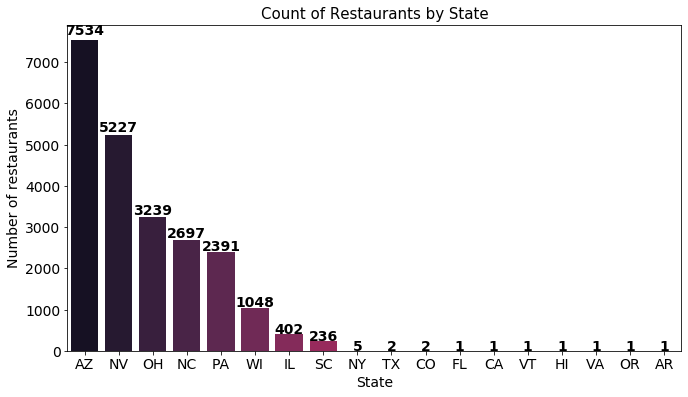

In [283]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("rocket", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

### Distribution of restaurants by cuisine type

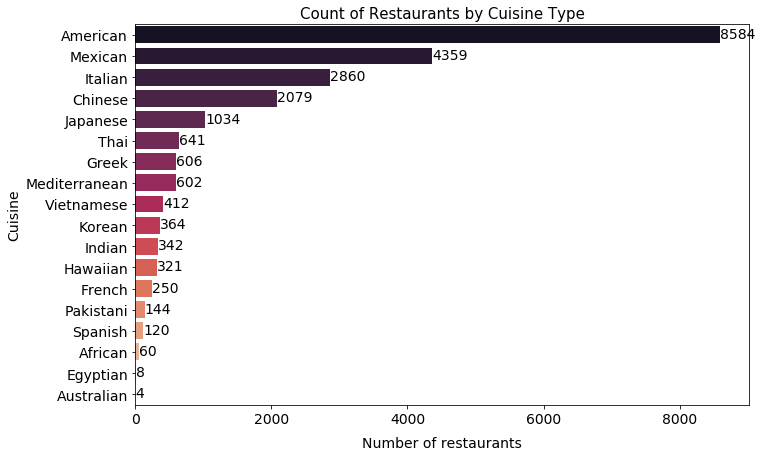

In [284]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.cuisine.value_counts()
sns.countplot(y='cuisine',data=us_restaurants,order = grouped.index, palette=sns.color_palette("rocket", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Cuisine', fontsize=14)
plt.title('Count of Restaurants by Cuisine Type', fontsize=15)
plt.tick_params(labelsize=14)
for  x, y in enumerate(us_restaurants.cuisine.value_counts()):
    plt.text(y, x+0.15, str(y),  fontsize=14)

### Number of Restaurants against Restaurant Ratings by Users

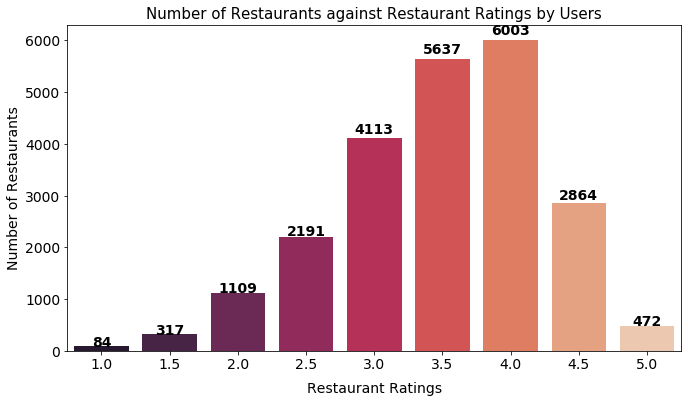

In [295]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("rocket", len(grouped)))
plt.xlabel('Restaurant Ratings', labelpad=10, fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Number of Restaurants against Restaurant Ratings by Users', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

### Count of Reviews against Review Rating

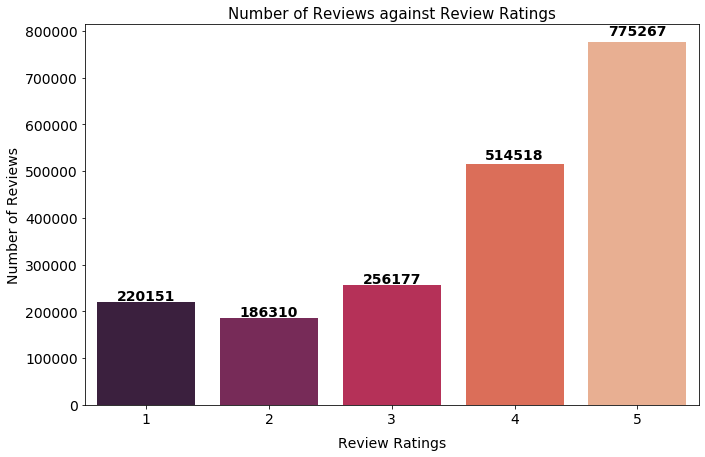

In [293]:
plt.figure(figsize=(11,7))
grouped = restaurants_reviews.review_star.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("rocket", len(grouped)))
plt.xlabel('Review Ratings', labelpad=10, fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Number of Reviews against Review Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

## Text Analysis

In [46]:
## import positive and negative words file
#positive_words = pd.read_csv('positive.txt')
#negative_words = pd.read_csv('negative.txt', encoding='latin-1')
#positive_words = list(positive_words)
#negative_words = list(negative_words)

In [35]:
#import positive words file
file_positive = open('positive.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

#import negative words file
file_negative = open('negative.txt', encoding='latin-1')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [36]:
#convert text to lower case
restaurants_reviews.text = restaurants_reviews.text.str.lower()

#remove unnecessary punctuation
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

In [37]:
#get dataset by cuisine type
def get_dataset(cuisine):
    df = restaurants_reviews[['removed_punct_text','labels']][restaurants_reviews.cuisine==cuisine]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df

#only keep positive and negative words
def filter_words(review):
    tokens = [word for word in review.split() if word in positive_words + negative_words]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

### American Restaurants

In [38]:
American_reviews = get_dataset('American')

In [39]:
American_X_train, American_X_test, American_y_train, American_y_test = \
train_test_split(American_reviews.text, American_reviews.labels, test_size=0.33, random_state=42)

In [40]:
print('Total %d number of reviews' % American_X_train.shape[0])

Total 524229 number of reviews


In [41]:
#filter words
American_X_train = American_X_train.apply(filter_words)

In [42]:
#convert list to string in the dataframe
American_X_train = [' '.join(i) if isinstance(i, list) else i for i in American_X_train]

In [43]:
#get bag of words
vectorizer = CountVectorizer()
American_feature_train = vectorizer.fit_transform(American_X_train)
American_feature_train.shape

(524229, 5401)

In [ ]:
## run model
#from sklearn.svm import SVC 
#svm = SVC(kernel='linear')
#svm.fit(American_feature_train, American_y_train)

In [44]:
#run support vector classifier
svm = LinearSVC()
#fit the training data to the model
svm.fit(American_feature_train, American_y_train)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [45]:
#create dataframe for score of each word
coeff = svm.coef_[0]
American_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [47]:
#get frequency of each word in all reviews for specific category
American_reviews = pd.DataFrame(American_feature_train.toarray(), columns=vectorizer.get_feature_names())
American_reviews['labels'] = American_y_train
American_frequency = American_reviews[American_reviews['labels']=='positive'].sum()[:-1]

In [48]:
American_words_score.set_index('word', inplace=True)

In [49]:
American_polarity_score = American_words_score
American_polarity_score['frequency'] = American_frequency

In [50]:
American_polarity_score['polarity'] = American_polarity_score.score * \
                                        American_polarity_score.frequency / American_reviews.shape[0]

In [51]:
#drop meaningless words
unuseful_positive_words = American_polarity_score.loc[['great','amazing','love','best','awesome','excellent',\
                                                     'good','favorite','loved','perfect','gem','perfectly',\
                                                     'wonderful','happy','enjoyed','nice','well','super',\
                                                     'like','better','decent','fine','pretty','enough',\
                                                     'excited','impressed','ready','fantastic','glad','right']]
unuseful_negative_words = American_polarity_score.loc[['bad','disappointed','unfortunately','disappointing',\
                                                      'horrible','lacking','terrible','sorry', 'disappoint']]

unnecessary_words = unuseful_positive_words + unuseful_negative_words
American_polarity_score.drop(unnecessary_words.index, axis=0, inplace=True)

In [52]:
American_polarity_score.polarity = American_polarity_score.polarity.astype(float)
American_polarity_score.frequency = American_polarity_score.frequency.astype(float)

In [57]:
American_polarity_score[American_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:11]

,score,frequency,polarity
word,,,
delicious,0.3245,37548.0000,0.0232
friendly,0.1444,32224.0000,0.0089
recommend,0.1753,18562.0000,0.0062
fresh,0.1102,20533.0000,0.0043
fun,0.1258,12146.0000,0.0029
incredible,0.3803,3405.0000,0.0025
perfection,0.4037,3206.0000,0.0025
outstanding,0.2685,4189.0000,0.0021
fast,0.1185,9200.0000,0.0021


In [302]:
American_polarity_score[American_polarity_score.polarity<0].sort_values('polarity')[:10]

,score,frequency,polarity
word,,,
worst,-0.7679,5121.0000,-0.0075
bland,-0.5891,5058.0000,-0.0057
mediocre,-0.7649,3838.0000,-0.0056
slow,-0.3608,8109.0000,-0.0056
cold,-0.2651,10758.0000,-0.0054
rude,-0.5611,4415.0000,-0.0047
poor,-0.5707,3979.0000,-0.0043
overpriced,-0.5240,3781.0000,-0.0038
awful,-0.6339,2950.0000,-0.0036


In [58]:
American_top_positive_words = ['delicious','friendly','recommend','fresh','fun',\
                             'incredible','perfection','outstanding','fast','attentive']
American_top_negative_words = ['worst','bland','slow','rude','hard', 'cold',\
                             'awful','overpriced','poor','mediocre']
American_top_words = American_polarity_score.loc[American_top_positive_words + American_top_negative_words,'polarity']

(array([-0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025]),
 <a list of 8 Text xticklabel objects>)

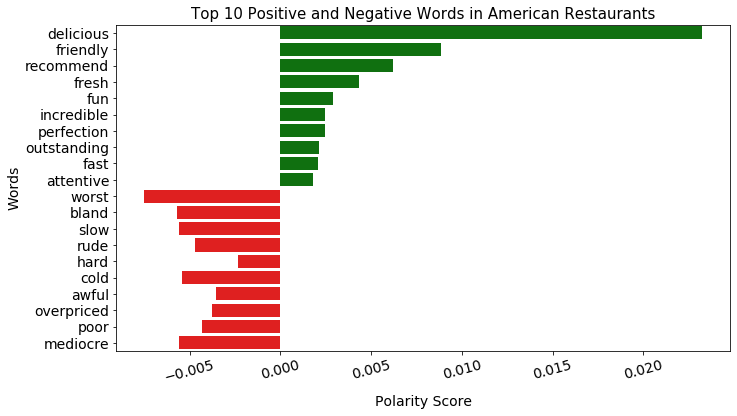

In [150]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'green' for c in American_top_words.values]
sns.barplot(y=American_top_words.index, x=American_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 10 Positive and Negative Words in American Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

## Mexican Restaurants 

In [67]:
Mexican_reviews = get_dataset('Mexican')
Mexican_X_train, Mexican_X_test, Mexican_y_train, Mexican_y_test = \
train_test_split(Mexican_reviews.text, Mexican_reviews.labels, test_size=0.33, random_state=42)

In [68]:
print('Total %d number of reviews' % Mexican_X_train.shape[0])

Total 179129 number of reviews


In [70]:
#filter words
Mexican_X_train = Mexican_X_train.apply(filter_words)

In [71]:
#convert list to string in the dataframe
Mexican_X_train = [' '.join(i) if isinstance(i, list) else i for i in Mexican_X_train]

In [72]:
#get bag of words
vectorizer = CountVectorizer()
Mexican_feature_train = vectorizer.fit_transform(Mexican_X_train)
Mexican_feature_train.shape

(179129, 4581)

In [73]:
#run svc model
svm = LinearSVC()
#Fit the training data to the model
svm.fit(Mexican_feature_train, Mexican_y_train)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
#create dataframe for score of each word
coeff = svm.coef_[0]
Mexican_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [75]:
#get frequency of each word in all reviews for specific category
Mexican_reviews = pd.DataFrame(Mexican_feature_train.toarray(), columns=vectorizer.get_feature_names())
Mexican_reviews['labels'] = Mexican_y_train
Mexican_frequency = Mexican_reviews[Mexican_reviews['labels']=='positive'].sum()[:-1]

In [76]:
Mexican_words_score.set_index('word', inplace=True)

In [77]:
Mexican_polarity_score = Mexican_words_score
Mexican_polarity_score['frequency'] = Mexican_frequency

In [78]:
Mexican_polarity_score['polarity'] = Mexican_polarity_score.score * \
                                        Mexican_polarity_score.frequency / Mexican_reviews.shape[0]

In [79]:
#drop meaningless words
unuseful_positive_words = Mexican_polarity_score.loc[['great','amazing','love','best','awesome','excellent',\
                                                     'good','favorite','loved','perfect','gem','perfectly',\
                                                     'wonderful','happy','enjoyed','nice','well','super',\
                                                     'like','better','decent','fine','pretty','enough',\
                                                     'excited','impressed','ready','fantastic','glad','right']]
unuseful_negative_words = Mexican_polarity_score.loc[['bad','disappointed','unfortunately','disappointing',\
                                                      'horrible','lacking','terrible','sorry', 'disappoint']]

unnecessary_words = unuseful_positive_words + unuseful_negative_words
Mexican_polarity_score.drop(unnecessary_words.index, axis=0, inplace=True)

In [80]:
Mexican_polarity_score.polarity = Mexican_polarity_score.polarity.astype(float)
Mexican_polarity_score.frequency = Mexican_polarity_score.frequency.astype(float)

In [81]:
Mexican_polarity_score[Mexican_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:11]

,score,frequency,polarity
word,,,
delicious,0.3980,12238.0000,0.0272
friendly,0.1712,9878.0000,0.0094
fresh,0.1585,10097.0000,0.0089
recommend,0.1665,5969.0000,0.0055
authentic,0.1362,5193.0000,0.0039
fast,0.1072,4944.0000,0.0030
clean,0.1252,3800.0000,0.0027
incredible,0.4637,962.0000,0.0025
bomb,0.4433,892.0000,0.0022


In [82]:
Mexican_polarity_score[Mexican_polarity_score.polarity<0].sort_values('polarity')[:10]

,score,frequency,polarity
word,,,
bland,-0.6537,2847.0000,-0.0104
worst,-0.8342,1960.0000,-0.0091
rude,-0.6190,1627.0000,-0.0056
mediocre,-0.8141,1140.0000,-0.0052
cold,-0.3567,2513.0000,-0.0050
slow,-0.3439,2468.0000,-0.0047
poor,-0.5651,1153.0000,-0.0036
overpriced,-0.5744,1086.0000,-0.0035
awful,-0.6084,1021.0000,-0.0035


In [84]:
Mexican_top_positive_words = ['delicious','fresh','recommend','authentic','fast','clean',\
                             'incredible','bomb','outstanding','friendly']
Mexican_top_negative_words = ['bland','worst','rude','mediocre','cold', 'slow',\
                             'poor','overpriced','awful','disgusting']
Mexican_top_words = Mexican_polarity_score.loc[Mexican_top_positive_words + Mexican_top_negative_words,'polarity']

(array([-0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
         0.025,  0.03 ]), <a list of 10 Text xticklabel objects>)

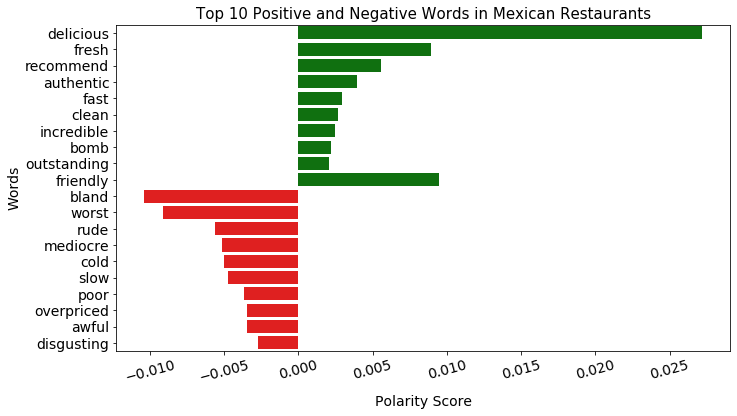

In [149]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'green' for c in Mexican_top_words.values]
sns.barplot(y=Mexican_top_words.index, x=Mexican_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 10 Positive and Negative Words in Mexican Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

## Italian Restaurants 

In [86]:
Italian_reviews = get_dataset('Italian')
Italian_X_train, Italian_X_test, Italian_y_train, Italian_y_test = \
train_test_split(Italian_reviews.text, Italian_reviews.labels, test_size=0.33, random_state=42)
print('Total %d number of reviews' % Italian_X_train.shape[0])

Total 160650 number of reviews


In [87]:
## filter words
Italian_X_train = Italian_X_train.apply(filter_words)

In [88]:
#convert list to string in the dataframe
Italian_X_train = [' '.join(i) if isinstance(i, list) else i for i in Italian_X_train]

In [130]:
# get bag of words 
vectorizer = CountVectorizer()
Italian_feature_train = vectorizer.fit_transform(Italian_X_train)
Italian_feature_train.shape

(160650, 4643)

In [131]:
# run svm model
svm = LinearSVC()
#Fit the training data to the model
svm.fit(Italian_feature_train, Italian_y_train)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [132]:
#create dataframe for score of each word
coeff = svm.coef_[0]
Italian_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [133]:
#get frequency of each word in all reviews for specific category
Italian_reviews = pd.DataFrame(Italian_feature_train.toarray(), columns=vectorizer.get_feature_names())
Italian_reviews['labels'] = Italian_y_train
Italian_frequency = Italian_reviews[Italian_reviews['labels']=='positive'].sum()[:-1]

In [134]:
Italian_words_score.set_index('word', inplace=True)
Italian_polarity_score = Italian_words_score
Italian_polarity_score['frequency'] = Italian_frequency

In [135]:
Italian_polarity_score['polarity'] = Italian_polarity_score.score * \
                                        Italian_polarity_score.frequency / Italian_reviews.shape[0]

In [136]:
#drop meaningless words
unuseful_positive_words = Italian_polarity_score.loc[['great','amazing','love','best','awesome','excellent',\
                                                     'good','favorite','loved','perfect','gem','perfectly',\
                                                     'wonderful','happy','enjoyed','nice','well','super',\
                                                     'like','better','decent','fine','pretty','enough',\
                                                     'excited','impressed','ready','fantastic','glad','right']]
unuseful_negative_words = Italian_polarity_score.loc[['bad','disappointed','unfortunately','disappointing',\
                                                      'horrible','lacking','terrible','sorry', 'disappoint']]

unnecessary_words = unuseful_positive_words + unuseful_negative_words
Italian_polarity_score.drop(unnecessary_words.index, axis=0, inplace=True)

In [137]:
Italian_polarity_score.polarity = Italian_polarity_score.polarity.astype(float)
Italian_polarity_score.frequency = Italian_polarity_score.frequency.astype(float)

In [142]:
Italian_polarity_score[Italian_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:12]

,score,frequency,polarity
word,,,
delicious,0.3396,13496.0000,0.0285
friendly,0.1425,9132.0000,0.0081
recommend,0.1858,6460.0000,0.0075
fresh,0.1178,9363.0000,0.0069
incredible,0.3392,1309.0000,0.0028
authentic,0.2143,2071.0000,0.0028
outstanding,0.2577,1664.0000,0.0027
die,0.3183,1344.0000,0.0027
perfection,0.4227,1004.0000,0.0026


In [303]:
Italian_polarity_score[Italian_polarity_score.polarity<0].sort_values('polarity')[:10]

,score,frequency,polarity
word,,,
worst,-0.8471,1675.0000,-0.0088
bland,-0.6741,2025.0000,-0.0085
mediocre,-0.8153,1234.0000,-0.0063
cold,-0.3068,2868.0000,-0.0055
rude,-0.5405,1581.0000,-0.0053
awful,-0.7870,879.0000,-0.0043
overpriced,-0.5651,1220.0000,-0.0043
slow,-0.3464,1983.0000,-0.0043
poor,-0.5092,1254.0000,-0.0040


In [304]:
Italian_top_positive_words = ['delicious','fresh','recommend','authentic','perfection',\
                             'incredible','reasonable','outstanding','friendly', 'fabulous']
Italian_top_negative_words = ['bland','worst','rude','mediocre','cold', 'slow',\
                             'poor','overpriced','awful','wrong']
Italian_top_words = Italian_polarity_score.loc[Italian_top_positive_words + Italian_top_negative_words,'polarity']

(array([-0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
         0.025,  0.03 ,  0.035]), <a list of 11 Text xticklabel objects>)

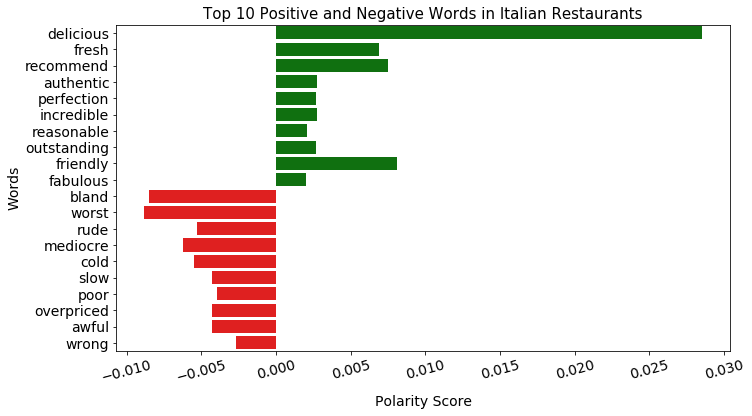

In [305]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'green' for c in Italian_top_words.values]
sns.barplot(y=Italian_top_words.index, x=Italian_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 10 Positive and Negative Words in Italian Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

## Chinese Restaurant

In [92]:
Chinese_reviews = get_dataset('Chinese')
Chinese_X_train, Chinese_X_test, Chinese_y_train, Chinese_y_test = \
train_test_split(Chinese_reviews.text, Chinese_reviews.labels, test_size=0.33, random_state=42)
print('Total %d number of reviews' % Chinese_X_train.shape[0])

Total 78911 number of reviews


In [93]:
# filter words
Chinese_X_train = Chinese_X_train.apply(filter_words)

In [94]:
#convert list to string in the dataframe
Chinese_X_train = [' '.join(i) if isinstance(i, list) else i for i in Chinese_X_train]

In [95]:
#get bag of words : the frequencies of various words appeared in each review
vectorizer = CountVectorizer()
Chinese_feature_train = vectorizer.fit_transform(Chinese_X_train)
Chinese_feature_train.shape

(78911, 4087)

In [117]:
# run svm model
svm_CHN = LinearSVC()
svm_CHN.fit(Chinese_feature_train, Chinese_y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [118]:
# create dataframe for score of each word
coeff = svm_CHN.coef_[0]
Chinese_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [119]:
# get frequency of each word in all reviews for specific category
Chinese_reviews = pd.DataFrame(Chinese_feature_train.toarray(), columns=vectorizer.get_feature_names())
Chinese_reviews['labels'] = Chinese_y_train
Chinese_frequency = Chinese_reviews[Chinese_reviews['labels']=='positive'].sum()[:-1]

In [120]:
Chinese_words_score.set_index('word', inplace=True)
Chinese_polarity_score = Chinese_words_score
Chinese_polarity_score['frequency'] = Chinese_frequency

In [121]:
Chinese_polarity_score['polarity'] = Chinese_polarity_score.score * \
                                        Chinese_polarity_score.frequency / Chinese_reviews.shape[0]

In [123]:
# drop meaningless words
unuseful_positive_words = Chinese_polarity_score.loc[['great','amazing','love','best','awesome','excellent',\
                                                     'good','favorite','loved','perfect','gem','perfectly',\
                                                     'wonderful','happy','enjoyed','nice','well','super',\
                                                     'like','better','decent','fine','pretty','enough',\
                                                     'excited','impressed','ready','fantastic','glad','right']]
unuseful_negative_words = Chinese_polarity_score.loc[['bad','disappointed','unfortunately','disappointing',\
                                                      'horrible','lacking','terrible','sorry', 'disappoint']]

unnecessary_words = unuseful_positive_words + unuseful_negative_words
Chinese_polarity_score.drop(unnecessary_words.index, axis=0, inplace=True)

In [124]:
Chinese_polarity_score.polarity = Chinese_polarity_score.polarity.astype(float)
Chinese_polarity_score.frequency = Chinese_polarity_score.frequency.astype(float)

In [125]:
Chinese_polarity_score[Chinese_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:11]

,score,frequency,polarity
word,,,
delicious,0.4054,4217.0000,0.0217
fresh,0.1751,4092.0000,0.0091
friendly,0.1915,3588.0000,0.0087
recommend,0.1763,2620.0000,0.0059
authentic,0.2170,1987.0000,0.0055
hot,0.0779,4642.0000,0.0046
reasonable,0.2405,969.0000,0.0030
clean,0.1010,2146.0000,0.0027
fast,0.0942,2294.0000,0.0027


In [126]:
Chinese_polarity_score[Chinese_polarity_score.polarity<0].sort_values('polarity')[:10]

,score,frequency,polarity
word,,,
worst,-0.8825,1047.0000,-0.0117
bland,-0.5769,1381.0000,-0.0101
mediocre,-0.7316,523.0000,-0.0048
rude,-0.4366,825.0000,-0.0046
poor,-0.5728,545.0000,-0.0040
awful,-0.6393,469.0000,-0.0038
cold,-0.2311,1231.0000,-0.0036
disgusting,-0.7286,381.0000,-0.0035
overpriced,-0.5498,467.0000,-0.0033


In [127]:
Chinese_top_positive_words = ['delicious','fresh','friendly','recommend','authentic','hot','reasonable',\
                             'incredible','clean','fast']
Chinese_top_negative_words = ['bland','worst','rude','mediocre','cold', 'dirty',\
                             'poor','overpriced','awful','disgusting']
Chinese_top_words = Chinese_polarity_score.loc[Chinese_top_positive_words + Chinese_top_negative_words,'polarity']

(array([-0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
         0.025]), <a list of 9 Text xticklabel objects>)

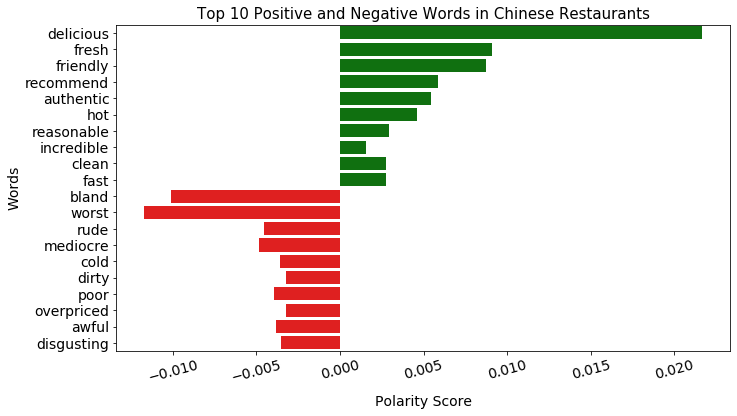

In [166]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'green' for c in Chinese_top_words.values]
sns.barplot(y=Chinese_top_words.index, x=Chinese_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 10 Positive and Negative Words in Chinese Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

## Japanese Restaurants

In [152]:
Japanese_reviews = get_dataset('Chinese')
Japanese_X_train, Japanese_X_test, Japanese_y_train, Japanese_y_test = \
train_test_split(Japanese_reviews.text, Japanese_reviews.labels, test_size=0.33, random_state=42)
print('Total %d number of reviews' % Japanese_X_train.shape[0])

Total 78911 number of reviews


In [153]:
# filter words
Japanese_X_train = Japanese_X_train.apply(filter_words)

#convert list to string in the dataframe
Japanese_X_train = [' '.join(i) if isinstance(i, list) else i for i in Japanese_X_train]

In [154]:
# get bag of words
vectorizer = CountVectorizer()
Japanese_feature_train = vectorizer.fit_transform(Japanese_X_train)
Japanese_feature_train.shape

(78911, 4087)

In [155]:
# run svm model
svm_JP = LinearSVC()

#Fit the training data to the model
svm_JP.fit(Japanese_feature_train, Japanese_y_train)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [156]:
# create dataframe for score of each word
coeff = svm_JP.coef_[0]
Japanese_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [157]:
# get frequency of each word in all reviews for specific category
Japanese_reviews = pd.DataFrame(Japanese_feature_train.toarray(), columns=vectorizer.get_feature_names())
Japanese_reviews['labels'] = Japanese_y_train
Japanese_frequency = Japanese_reviews[Japanese_reviews['labels']=='positive'].sum()[:-1]

In [158]:
Japanese_words_score.set_index('word', inplace=True)
Japanese_polarity_score = Japanese_words_score
Japanese_polarity_score['frequency'] = Japanese_frequency

In [159]:
Japanese_polarity_score['polarity'] = Japanese_polarity_score.score * \
                                        Japanese_polarity_score.frequency / Japanese_reviews.shape[0]

In [160]:
# drop meaningless words
unuseful_positive_words = Japanese_polarity_score.loc[['great','amazing','love','best','awesome','excellent',\
                                                     'good','favorite','loved','perfect','gem','perfectly',\
                                                     'wonderful','happy','enjoyed','nice','well','super',\
                                                     'like','better','decent','fine','pretty','enough',\
                                                     'excited','impressed','ready','fantastic','glad','right']]
unuseful_negative_words = Japanese_polarity_score.loc[['bad','disappointed','unfortunately','disappointing',\
                                                      'horrible','lacking','terrible','sorry', 'disappoint']]

unnecessary_words = unuseful_positive_words + unuseful_negative_words
Japanese_polarity_score.drop(unnecessary_words.index, axis=0, inplace=True)

In [161]:
Japanese_polarity_score.polarity = Japanese_polarity_score.polarity.astype(float)
Japanese_polarity_score.frequency = Japanese_polarity_score.frequency.astype(float)

In [162]:
Japanese_polarity_score[Japanese_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:11]

,score,frequency,polarity
word,,,
delicious,0.4054,4217.0000,0.0217
fresh,0.1751,4092.0000,0.0091
friendly,0.1915,3588.0000,0.0087
recommend,0.1763,2620.0000,0.0059
authentic,0.2170,1987.0000,0.0055
hot,0.0779,4642.0000,0.0046
reasonable,0.2405,969.0000,0.0030
clean,0.1010,2146.0000,0.0027
fast,0.0942,2294.0000,0.0027


In [163]:
Japanese_polarity_score[Japanese_polarity_score.polarity<0].sort_values('polarity')[:10]

,score,frequency,polarity
word,,,
worst,-0.8825,1047.0000,-0.0117
bland,-0.5769,1381.0000,-0.0101
mediocre,-0.7316,523.0000,-0.0048
rude,-0.4366,825.0000,-0.0046
poor,-0.5728,545.0000,-0.0040
awful,-0.6393,469.0000,-0.0038
cold,-0.2311,1231.0000,-0.0036
disgusting,-0.7286,381.0000,-0.0035
overpriced,-0.5498,467.0000,-0.0033


In [164]:
Japanese_top_positive_words = ['delicious','fresh','friendly','recommend','authentic','hot','reasonable',\
                             'incredible','clean','fast']
Japanese_top_negative_words = ['bland','worst','rude','mediocre','cold', 'dirty',\
                             'poor','overpriced','awful','disgusting']
Japanese_top_words = Japanese_polarity_score.loc[Japanese_top_positive_words + Japanese_top_negative_words,'polarity']

(array([-0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
         0.025]), <a list of 9 Text xticklabel objects>)

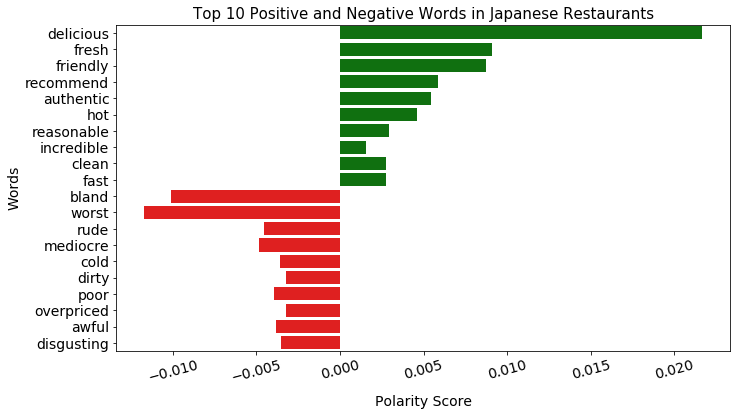

In [165]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'green' for c in Chinese_top_words.values]
sns.barplot(y=Japanese_top_words.index, x=Japanese_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 10 Positive and Negative Words in Japanese Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

In [263]:
top_pos_words = pd.DataFrame(np.array([American_top_positive_words,\
                                       Mexican_top_positive_words,\
                                       Italian_top_positive_words,\
                                       Japanese_top_positive_words,\
                                       Chinese_top_positive_words]), \
                             columns=['1','2','3','4','5','6','7','8','9','10'])

In [264]:
top_pos_words.rename(index={0: "American", 1: "Mexican", 2: "Italian", 3: "Japanese", 4:"Chinese"})

,1,2,3,4,5,6,7,8,9,10
American,delicious,friendly,recommend,fresh,fun,incredible,perfection,outstanding,fast,attentive
Mexican,delicious,fresh,recommend,authentic,fast,clean,incredible,bomb,outstanding,friendly
Italian,delicious,fresh,recommend,authentic,perfection,incredible,reasonable,outstanding,friendly,fabulous
Japanese,delicious,fresh,friendly,recommend,authentic,hot,reasonable,incredible,clean,fast
Chinese,delicious,fresh,friendly,recommend,authentic,hot,reasonable,incredible,clean,fast


In [265]:
top_neg_words = pd.DataFrame(np.array([American_top_negative_words,\
                                       Mexican_top_negative_words,\
                                       Italian_top_negative_words,\
                                       Japanese_top_negative_words,\
                                       Chinese_top_negative_words]), \
                             columns=['1','2','3','4','5','6','7','8','9','10'])

In [266]:
top_neg_words.rename(index={0: "American", 1: "Mexican", 2: "Italian", 3: "Japanese", 4:"Chinese"})

,1,2,3,4,5,6,7,8,9,10
American,worst,bland,slow,rude,hard,cold,awful,overpriced,poor,mediocre
Mexican,bland,worst,rude,mediocre,cold,slow,poor,overpriced,awful,disgusting
Italian,bland,worst,rude,mediocre,cold,slow,poor,overpriced,awful,expensive
Japanese,bland,worst,rude,mediocre,cold,dirty,poor,overpriced,awful,disgusting
Chinese,bland,worst,rude,mediocre,cold,dirty,poor,overpriced,awful,disgusting
